In [1]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")
    
from src.utils import *
from src.plots import *
import torch.optim as optim

In [2]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
embs = torch.load('../embeddings/audio/raw_hubert.pt')

In [3]:
train_loader, test_loader = train_test_dataloader(embs)

In [4]:
model = MLP(input_dim = 1024, hidden_dims = [1024], output_dim = 6, dropout = 0.3).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
num_epochs = 50

PARAMS = {'model': model,
          'criterion': criterion,
          'optimizer': optimizer,
          'num_epochs': num_epochs,
          'train_loader': train_loader,
          'test_loader': test_loader,
          'device': DEVICE,
          'patience': 10}

/home/mweuro/venvy/best_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
results = train_model(**PARAMS)

Epoch 5/50
Train Loss: 1.3662,                    Train Accuracy: 0.4723,                    Train Precision: 0.4653,                    Train Recall 0.4723.
Val Loss: 1.3367,                    Val Accuracy: 0.4963,                    Val Precision: 0.5244,                    Val Recall: 0.4963.
--------------------------------------------------


Epoch 10/50
Train Loss: 1.1737,                    Train Accuracy: 0.5596,                    Train Precision: 0.5533,                    Train Recall 0.5596.
Val Loss: 1.1553,                    Val Accuracy: 0.5782,                    Val Precision: 0.5875,                    Val Recall: 0.5782.
--------------------------------------------------


Epoch 15/50
Train Loss: 1.0789,                    Train Accuracy: 0.5875,                    Train Precision: 0.5808,                    Train Recall 0.5875.
Val Loss: 1.1251,                    Val Accuracy: 0.5675,                    Val Precision: 0.6069,                    Val Recall: 0.5675.
--------------------------------------------------


Epoch 20/50
Train Loss: 1.0144,                    Train Accuracy: 0.6171,                    Train Precision: 0.6117,                    Train Recall 0.6171.
Val Loss: 1.0210,                    Val Accuracy: 0.6387,                    Val Precision: 0.6524,                    Val Recall: 0.6387.
--------------------------------------------------


Epoch 25/50
Train Loss: 0.9643,                    Train Accuracy: 0.6384,                    Train Precision: 0.6336,                    Train Recall 0.6384.
Val Loss: 0.9910,                    Val Accuracy: 0.6447,                    Val Precision: 0.6638,                    Val Recall: 0.6447.
--------------------------------------------------


Epoch 30/50
Train Loss: 0.9274,                    Train Accuracy: 0.6593,                    Train Precision: 0.6560,                    Train Recall 0.6593.
Val Loss: 0.9605,                    Val Accuracy: 0.6454,                    Val Precision: 0.6692,                    Val Recall: 0.6454.
--------------------------------------------------


Epoch 35/50
Train Loss: 0.8923,                    Train Accuracy: 0.6660,                    Train Precision: 0.6623,                    Train Recall 0.6660.
Val Loss: 0.9114,                    Val Accuracy: 0.6629,                    Val Precision: 0.6708,                    Val Recall: 0.6629.
--------------------------------------------------


Epoch 40/50
Train Loss: 0.8686,                    Train Accuracy: 0.6781,                    Train Precision: 0.6752,                    Train Recall 0.6781.
Val Loss: 0.9038,                    Val Accuracy: 0.6736,                    Val Precision: 0.6875,                    Val Recall: 0.6736.
--------------------------------------------------


Epoch 45/50
Train Loss: 0.8574,                    Train Accuracy: 0.6788,                    Train Precision: 0.6767,                    Train Recall 0.6788.
Val Loss: 0.8615,                    Val Accuracy: 0.6958,                    Val Precision: 0.6980,                    Val Recall: 0.6958.
--------------------------------------------------


Epoch 50/50
Train Loss: 0.8270,                    Train Accuracy: 0.6924,                    Train Precision: 0.6904,                    Train Recall 0.6924.
Val Loss: 0.8602,                    Val Accuracy: 0.6870,                    Val Precision: 0.6993,                    Val Recall: 0.6870.
--------------------------------------------------
BEST EPOCH: 44.00          BEST ACCURACY: 0.70          BEST PRECISION: 0.70          BEST RECALL: 0.70


In [6]:
epochs, train_losses, val_losses, train_accs, val_accs, train_precs, val_precs, train_recs, val_recs, best_epoch, cm = results

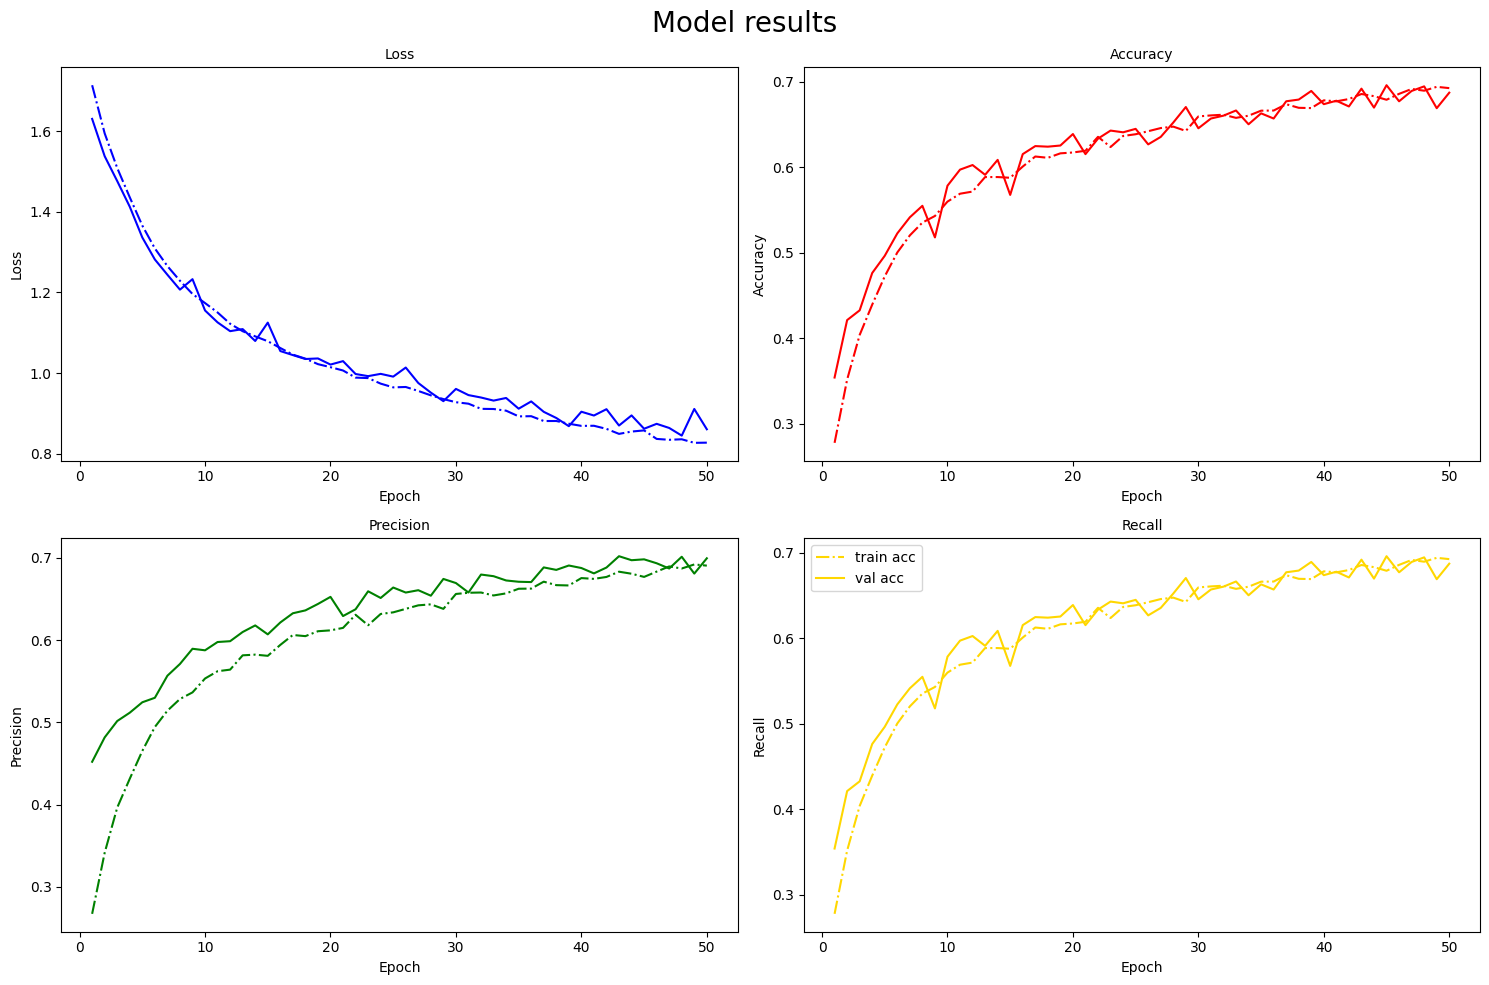

In [7]:
plot_metrics(train_losses, val_losses, train_accs, val_accs, train_precs, val_precs, train_recs, val_recs)

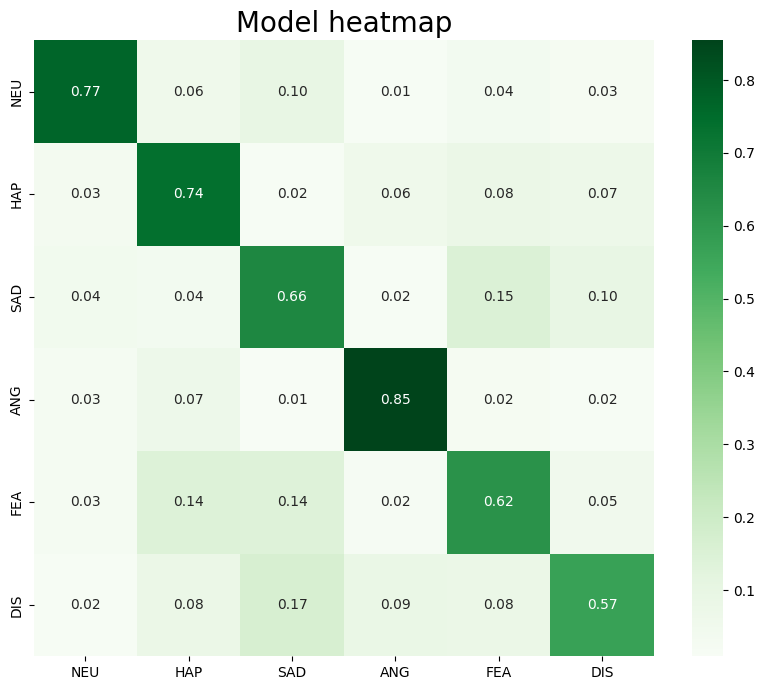

In [8]:
plot_confusion_matrix(cm)